# House Prices - Advanced Regression Techniques

## Libraries importation

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import spicy as sp
from dython.nominal import associations
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [118]:
# Dataset download
data = pd.read_csv(r'D:\docaivancity\entrainements\house-prices-advanced-regression-techniques\train.csv',index_col='Id')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [120]:
# We have 37 numerical variables and 43 categorical variables 
# We also notice that there are some variables like YearBuilt or Mosold are considerated as number which is not correct 
# So we need to chage their actual type to the correct one


# Splitting data

In [121]:
target = data['SalePrice']
data = data.drop(columns='SalePrice')

## Transformation of the types of some values

In [122]:
import re
for i in data.columns.to_list():
    if re.search('Yr',i) or re.search('Year',i) or re.search('Mo',i):
        data[i] = data[i].astype('object')
        print(i)

YearBuilt
YearRemodAdd
GarageYrBlt
MoSold
YrSold


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## Visualisation of the distribu tion of de SalePrice

<Axes: ylabel='Density'>

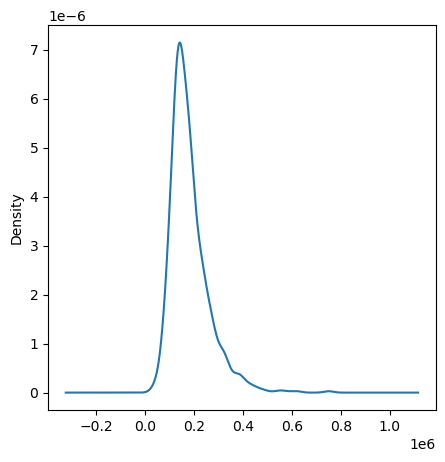

In [124]:
target.plot(kind = 'density')

## Duplicated data

In [125]:
data.duplicated().sum()

0

In [126]:
# This database doesn't content any duplicated values

## Missing values

In [127]:
cat_col = data.select_dtypes(include='object').columns.to_list()
num_col=data.select_dtypes(exclude='object').columns.to_list()

In [128]:
len(cat_col)

48

In [129]:
len(num_col)

31

In [130]:
# Calculate the percentage of missing values for each column
missing_percentage_cat = data[cat_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_cat[missing_percentage_cat > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per categorical column:")
print(missing_percentage)

Percentage of missing values per categorical column:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
Electrical       0.068493
dtype: float64


In [131]:
# Calculate the percentage of missing values for each column
missing_percentage_num = data[num_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_num[missing_percentage_num > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per numerical column:")
print(missing_percentage)

Percentage of missing values per numerical column:
LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64


## Handling missing values

### Numerical values

<Axes: >

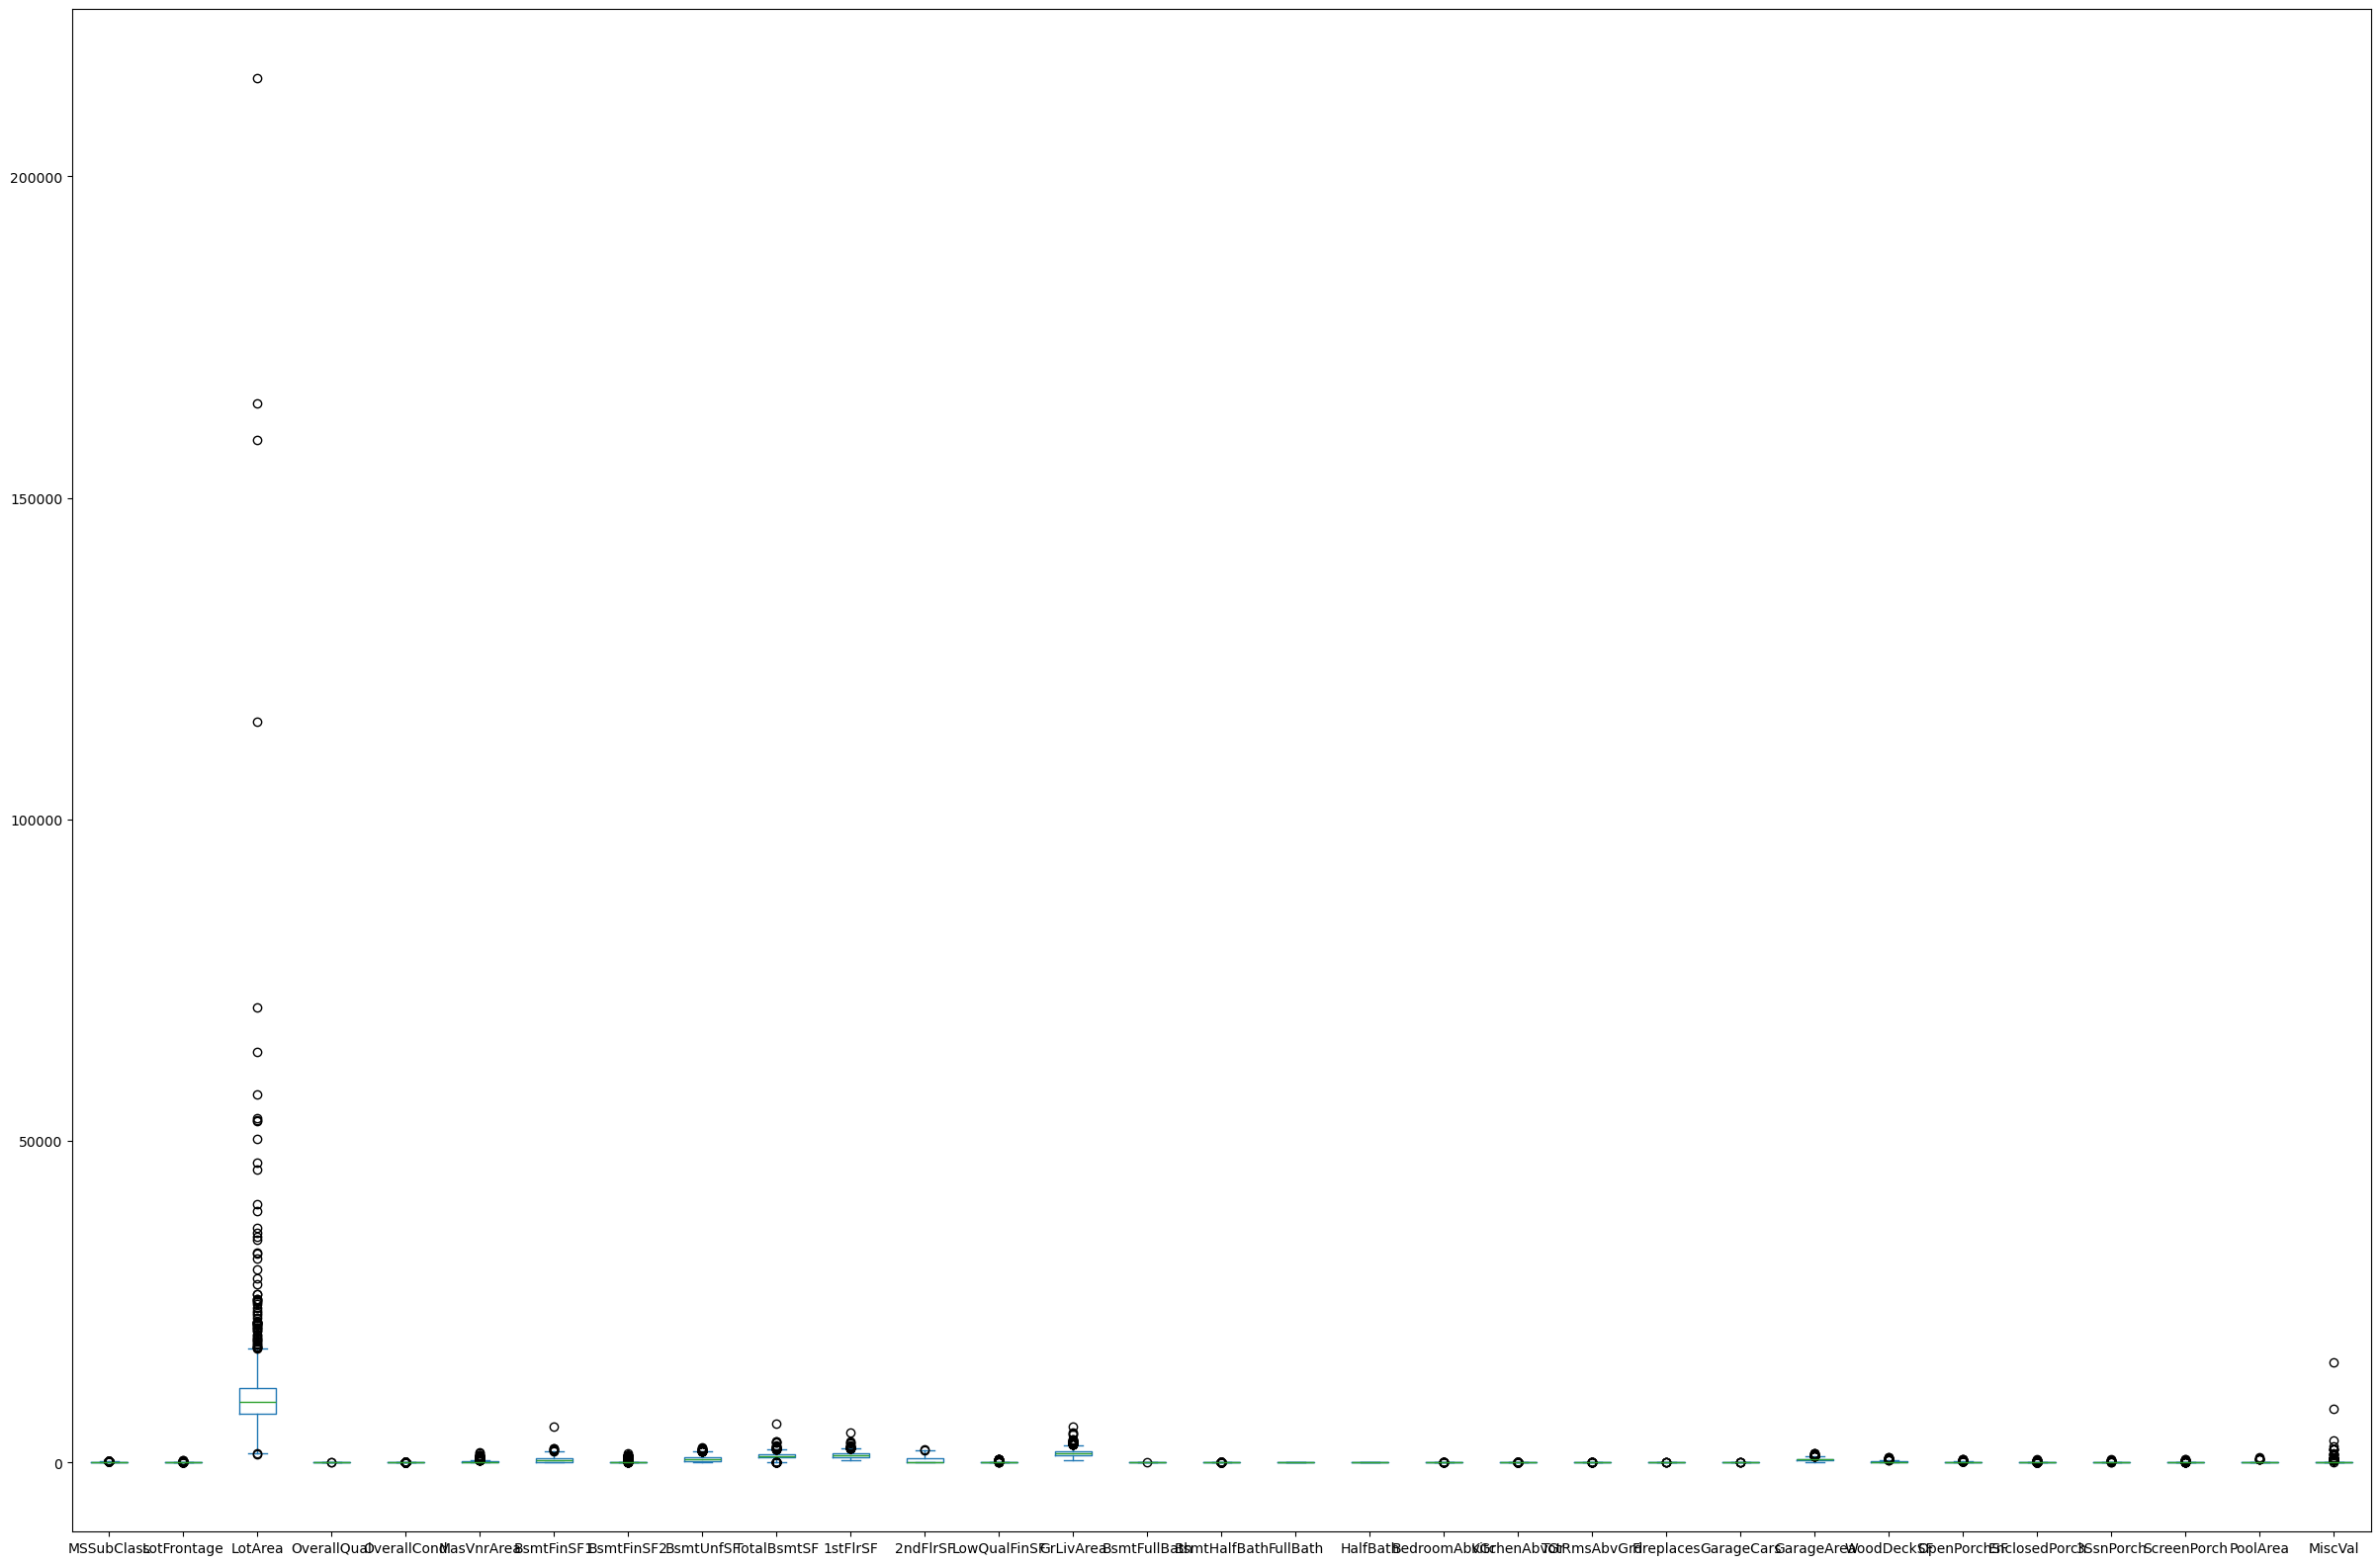

In [132]:
data.plot(kind='box',figsize=(30,20))

In [133]:
# Calculating of the first and the third quantile
q1 = data.quantile(0.25,numeric_only=True)
q3 = data.quantile(0.75,numeric_only=True)
low = q1-1.5*(q3-q1)
high = q3+1.5*(q3-q1)

In [134]:
# Outlier percentage for 'MasVnrArea'
(((data['MasVnrArea']<low['MasVnrArea'])|(data['MasVnrArea']>high['MasVnrArea'])).sum()/data.shape[0]*100)

6.575342465753424

In [135]:
# Outlier percentage for 'LotFrontage'
(((data['LotFrontage']<low['LotFrontage'])|(data['LotFrontage']>high['LotFrontage'])).sum()/data.shape[0]*100)

6.027397260273973

In [136]:
# We fill the missing by the median because the outlier percentange of both columns are more than 5%
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].median()) 
data['MasVnrArea'] =  data['MasVnrArea'].fillna(data['MasVnrArea'].median())

In [137]:
# Calculate the percentage of missing values for each column
missing_percentage_num = data[num_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_num[missing_percentage_num > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per numerical column:")
print(missing_percentage)

Percentage of missing values per numerical column:
Series([], dtype: float64)


### Categorial values

In [138]:
# We will fill the missing value of Electrical columns by the mode ( the most frequent value)
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode())

In [139]:
# We will do the same of the variable which refers to a date like years and month
for col in data.columns:
    if re.search(r'Yr|Year|Mo', col):
        if data[col].isna().any():
            data[col] = data[col].fillna(data[col].mode()[0])

C:\Users\elong\AppData\Local\Temp\ipykernel_30736\474655498.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [141]:
# Calculate the percentage of missing values for each column
missing_percentage_cat = data[cat_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_cat[missing_percentage_cat > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per categorical column:")
print(missing_percentage)

Percentage of missing values per categorical column:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64


## Normalisation

In [142]:
data.mean(numeric_only=True)

MSSubClass          56.897260
LotFrontage         69.863699
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
MasVnrArea         103.117123
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1979.976027
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal             43.489041
dtype: float64

In [143]:
mean = data.mean(numeric_only=True)

In [144]:
data[num_col] = data[num_col].apply(lambda x : (x-x.mean())/x.std())

In [145]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073350,RL,-0.220799,-0.207071,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,2,2008,WD,Normal
2,-0.872264,RL,0.460162,-0.091855,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,5,2007,WD,Normal
3,0.073350,RL,-0.084607,0.073455,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,9,2008,WD,Normal
4,0.309753,RL,-0.447787,-0.096864,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,2,2006,WD,Abnorml
5,0.073350,RL,0.641752,0.375020,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073350,RL,-0.356992,-0.260471,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.270116,-0.068668,NaN,NaN,NaN,-0.087658,8,2007,WD,Normal
1457,-0.872264,RL,0.687149,0.266316,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.270116,-0.068668,NaN,MnPrv,NaN,-0.087658,2,2010,WD,Normal
1458,0.309753,RL,-0.175402,-0.147760,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.270116,-0.068668,NaN,GdPrv,Shed,4.951415,5,2010,WD,Normal


## Encodage

In [146]:
def hierarchical_encoding(df: pd.DataFrame) -> pd.DataFrame:
    # Ordered mappings
    quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0, None: 0}
    functionality_mapping = {
        "Typ": 5, "Min1": 4, "Min2": 3, "Mod": 2,
        "Maj1": 1, "Maj2": 1, "Sev": 0, "Sal": 0, None: 0
    }
    paved_mapping = {"Y": 2, "P": 1, "N": 0, None: 0}
    garage_finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1, "NA": 0, None: 0}
    bsmt_finish_mapping = {
        "GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0, None: 0
    }
    electrical_mapping = {
        "SBrkr": 4, "FuseA": 3, "FuseF": 2, "FuseP": 1, "Mix": 0, None: 0
    }
    roofstyle_mapping = {
        "Gable": 4, "Hip": 3, "Gambrel": 2, "Mansard": 2, "Shed": 1, "Flat": 0, None: 0
    }
    lotslope_mapping = {"Gtl": 2, "Mod": 1, "Sev": 0, None: 0}
    lotshape_mapping = {"Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0, None: 0}
    landcontour_mapping = {"Lvl": 3, "Bnk": 2, "HLS": 1, "Low": 0, None: 0}

    # Ordinal columns by type
    quality_cols = [
        "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC",
        "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"
    ]
    functionality_cols = ["Functional"]
    paved_cols = ["PavedDrive"]
    garage_finish_cols = ["GarageFinish"]
    bsmt_finish_cols = ["BsmtFinType1", "BsmtFinType2"]
    electrical_cols = ["Electrical"]
    roofstyle_cols = ["RoofStyle"]
    lotslope_cols = ["LandSlope"]
    lotshape_cols = ["LotShape"]
    landcontour_cols = ["LandContour"]

    # Encodings
    encodings = [
        (quality_cols, quality_mapping),
        (functionality_cols, functionality_mapping),
        (paved_cols, paved_mapping),
        (garage_finish_cols, garage_finish_mapping),
        (bsmt_finish_cols, bsmt_finish_mapping),
        (electrical_cols, electrical_mapping),
        (roofstyle_cols, roofstyle_mapping),
        (lotslope_cols, lotslope_mapping),
        (lotshape_cols, lotshape_mapping),
        (landcontour_cols, landcontour_mapping)
    ]

    for cols, mapping in encodings:
        for col in cols:
            if col in df.columns:
                df[col] = df[col].map(mapping).fillna(0).astype(int)

    return df


In [147]:
data = hierarchical_encoding(data)

In [148]:
data = pd.get_dummies(data)

In [149]:
data

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofStyle,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073350,-0.220799,-0.207071,3,3,2,0.651256,-0.517023,4,0.513928,...,False,False,False,True,False,False,False,False,True,False
2,-0.872264,0.460162,-0.091855,3,3,2,-0.071812,2.178881,4,-0.570555,...,False,False,False,True,False,False,False,False,True,False
3,0.073350,-0.084607,0.073455,2,3,2,0.651256,-0.517023,4,0.325803,...,False,False,False,True,False,False,False,False,True,False
4,0.309753,-0.447787,-0.096864,2,3,2,0.651256,-0.517023,4,-0.570555,...,False,False,False,True,True,False,False,False,False,False
5,0.073350,0.641752,0.375020,2,3,2,1.374324,-0.517023,4,1.366021,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073350,-0.356992,-0.260471,3,3,2,-0.071812,-0.517023,4,-0.570555,...,False,False,False,True,False,False,False,False,True,False
1457,-0.872264,0.687149,0.266316,3,3,2,-0.071812,0.381612,4,0.087881,...,False,False,False,True,False,False,False,False,True,False
1458,0.309753,-0.175402,-0.147760,3,3,2,0.651256,3.077516,4,-0.570555,...,False,False,False,True,False,False,False,False,True,False


In [150]:
feature=data

# PCA

In [151]:
##### Principal Component Analysis #####
from sklearn.decomposition import PCA
# Fit PCA to the data (features)
pca = PCA().fit(feature)  # Fit PCA to the features

# Explained variance ratio as a percentage
imp = pca.explained_variance_ratio_ * 100  # Explained variance in percentag
imp.round(1)

array([91.8,  1.3,  0.9,  0.4,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

In [152]:
imp.cumsum().round(1) 

array([ 91.8,  93.1,  94. ,  94.4,  94.8,  95.1,  95.3,  95.6,  95.8,
        96. ,  96.1,  96.3,  96.5,  96.6,  96.8,  96.9,  97. ,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.1,  98.2,  98.2,  98.3,  98.3,  98.4,  98.4,  98.5,  98.5,
        98.6,  98.6,  98.6,  98.7,  98.7,  98.8,  98.8,  98.8,  98.8,
        98.9,  98.9,  98.9,  99. ,  99. ,  99. ,  99. ,  99.1,  99.1,
        99.1,  99.1,  99.2,  99.2,  99.2,  99.2,  99.2,  99.2,  99.3,
        99.3,  99.3,  99.3,  99.3,  99.3,  99.4,  99.4,  99.4,  99.4,
        99.4,  99.4,  99.4,  99.4,  99.5,  99.5,  99.5,  99.5,  99.5,
        99.5,  99.5,  99.5,  99.5,  99.5,  99.5,  99.6,  99.6,  99.6,
        99.6,  99.6,  99.6,  99.6,  99.6,  99.6,  99.6,  99.6,  99.6,
        99.6,  99.6,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.8,  99.8,  99.8,  99.8,
        99.8,  99.8,

For saving more than 95%(exactly 98%) zeb can use 3 compoments. So for our model we will choose 9 compoments which give us 98.5% of informations

In [153]:
# Projecting the features onto the principal components
X_projected = pd.DataFrame(pca.transform(feature), columns=['PCA' + str(i+1) for i in range(feature.shape[1])])

# Selecting the first 9 principal components as new features
new_features = X_projected[['PCA' + str(i+1) for i in range(0,9)]]

new_features

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,23.138989,-0.049472,1.730495,3.003719,-1.144822,1.557740,0.228775,-0.601203,-0.282550
1,-3.958428,1.726914,1.718696,-0.824760,0.714941,-0.454168,0.383822,-1.339239,-0.917407
2,21.168406,1.734534,0.980338,1.891385,1.172525,0.682435,-0.166249,-0.398276,-0.385087
3,17.963687,0.721062,0.036713,0.879141,1.685055,-0.699213,-0.542630,-0.218478,0.895528
4,20.268764,3.918058,-0.063134,2.502112,-0.577117,0.587485,0.020382,-0.241909,-0.791920
...,...,...,...,...,...,...,...,...,...
1455,19.013221,-0.970394,-3.488903,0.064084,1.520668,0.630254,0.403702,-0.085239,-0.431676
1456,-1.922344,3.155811,1.375306,-1.531547,-0.506380,-2.548603,0.584660,0.822100,0.263593
1457,-38.835120,4.671043,-0.545162,2.407220,1.152917,0.012587,-0.738230,-2.619950,1.682149
1458,-30.053230,-0.347310,4.472037,-0.676113,-0.849089,-1.184164,4.407850,1.245251,2.269143


## Splitting into training and testing data

In [154]:
x_train,x_test,y_train,y_test = tts(new_features,target,test_size=0.25,random_state = 42)

# MACHINE LEARNING MODELS

## 1.Linear regression

In [155]:
model1 = LinearRegression()

In [156]:
model1.fit(x_train,y_train)

LinearRegression()

In [157]:
model1.score(x_train,y_train)

0.7575207658981576

In [158]:
predict1 = model1.predict(x_test)

In [159]:
model1.score(x_test,y_test)

0.79431940879155

## 2.Randomforest

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [161]:
# Define the function for Random Forest with hyperparameters
def random_forest_hyper_params(n_decision_tree, depth):
    alg_RandomForest = RandomForestRegressor(n_estimators=n_decision_tree, max_depth=depth, n_jobs=-1)
    model = alg_RandomForest.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print('Number of trees: {} | Max depth: {} | MSE: {} | R2: {}'.format(
        n_decision_tree, depth, round(mse, 3), round(r2, 3)))

In [162]:
# Iterate over the different values for the number of trees and max depth
for ith_decision_tree in [100,150,200,250]:
   # print(f"For {ith_decision_tree} trees, we have:\n")
    for depth in [20,30, 50, 60, 70,100,150,200]:
        random_forest_hyper_params(ith_decision_tree, depth) 

Number of trees: 100 | Max depth: 20 | MSE: 1141220209.485 | R2: 0.837
Number of trees: 100 | Max depth: 30 | MSE: 1077629408.895 | R2: 0.846
Number of trees: 100 | Max depth: 50 | MSE: 1103188820.664 | R2: 0.843
Number of trees: 100 | Max depth: 60 | MSE: 1076393912.22 | R2: 0.846
Number of trees: 100 | Max depth: 70 | MSE: 1072153332.754 | R2: 0.847
Number of trees: 100 | Max depth: 100 | MSE: 1124415320.175 | R2: 0.839
Number of trees: 100 | Max depth: 150 | MSE: 1118565871.112 | R2: 0.84
Number of trees: 100 | Max depth: 200 | MSE: 1047679684.875 | R2: 0.85
Number of trees: 150 | Max depth: 20 | MSE: 1102262727.069 | R2: 0.843
Number of trees: 150 | Max depth: 30 | MSE: 1118995536.767 | R2: 0.84
Number of trees: 150 | Max depth: 50 | MSE: 1134771928.293 | R2: 0.838
Number of trees: 150 | Max depth: 60 | MSE: 1070358908.078 | R2: 0.847
Number of trees: 150 | Max depth: 70 | MSE: 1077859138.96 | R2: 0.846
Number of trees: 150 | Max depth: 100 | MSE: 1091074654.69 | R2: 0.844
Number o

In [163]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=250, max_depth=30, n_jobs=-1)

In [164]:
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=250, n_jobs=-1)

In [165]:
model2.score(x_train,y_train)

0.9736070098281523

In [166]:
predict2 = model2.predict(x_test)

In [167]:
model2.score(x_test,y_test)

0.8443753610989431

## 3.Gradient Boosting

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

GradientBoostingRegressor()

In [169]:
model3.score(x_train,y_train)

0.950665041639585

In [170]:
predict3 = model3.predict(x_test)

In [171]:
model3.score(x_test,y_test)

0.8266936523233891

## 4.Decision Tree

In [172]:
from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor(max_depth=5)
model4.fit(x_train, y_train)
model4.score(x_train,y_train)

0.8662555499108919

In [173]:
predict4 = model4.predict(x_test)

In [174]:
model4.score(x_test,y_test)

0.7036909740788406

I will choose the model 2 (RandomForest) pour les prédictions sur le test.csv

# Application on the test dataset

In [175]:
test = pd.read_csv(r'D:\docaivancity\entrainements\house-prices-advanced-regression-techniques\test.csv',index_col='Id')
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [177]:
for i in test.columns.to_list():
    if re.search('Yr',i) or re.search('Year',i) or re.search('Mo',i):
        test[i] = test[i].astype('object')

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_cat = test[cat_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_cat[missing_percentage_cat > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per categorical column:")
print(missing_percentage)

Percentage of missing values per categorical column:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageYrBlt      5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MSZoning         0.274160
Functional       0.137080
Utilities        0.137080
KitchenQual      0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage_num = test[num_col].isna().mean() * 100

# Display only columns that have missing values
missing_percentage = missing_percentage_num[missing_percentage_num > 0]

# Sort columns by descending missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values per numerical column:")
print(missing_percentage)

Percentage of missing values per numerical column:
LotFrontage     15.558602
MasVnrArea       1.028101
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
GarageCars       0.068540
GarageArea       0.068540
dtype: float64
